# set things up and get the data

In [1]:
%%time
from Startup import *
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
# from scipy.stats import zscore

%matplotlib inline
# df = sqlContext.sql("SELECT * FROM parquet.`s3://philipp-ghcnd/GHCND_WT08_1960_2020_US.parquet`")

query =""" SELECT * FROM parquet.`/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/GHCND_WT08_1960_2020_US.parquet/` 
WHERE year >= 2006
"""
df = sqlContext.sql(query)
pdf = df.toPandas()

finished standard imports
dict_items([('spark.app.name', 'Weather_PCA'), ('spark.executor.memory', '3g'), ('spark.executor.cores', '1'), ('spark.cores.max', '4'), ('spark.default.parallelism', '10'), ('spark.logConf', 'True')])
started SparkContext and SQLContext in 6.33 seconds
loaded weather.parquet in 7.26 seconds
loaded stations.parquet in 0.15 seconds
registered dataframes as tables in 0.37 seconds
CPU times: user 1.02 s, sys: 625 ms, total: 1.64 s
Wall time: 18.1 s


## I exported the dataframe in string data type because that's the only thing that worked, so convert back...

In [2]:
print(pdf.head())
# pdf.iloc[100:104]
print(pdf.describe())
# len(list(pdf.iloc[1]['Values'].split(',')))
# pdf.iloc[1]['Values']

       Station  year                                             Values
0  USW00014735  2006  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...
1  USW00014735  2007  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
2  USW00014735  2008  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  USW00014735  2009  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...
4  USW00014735  2010  [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...
            Station   year                                             Values
count         12950  12950                                              12950
unique          937     15                                              12746
top     USW00024157   2012  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
freq             15    910                                                 16


In [3]:
%%time
from ast import literal_eval
pdf['Values'] = pdf['Values'].apply(literal_eval) # think I saved it as string

CPU times: user 6.62 s, sys: 156 ms, total: 6.78 s
Wall time: 7.01 s


In [15]:
print(pdf.head())

wt08_graphs=[]
for i in range(pdf.shape[0]):
    wt08_graphs.append(pdf.iloc[i,2])
wt08_graphs=np.stack(wt08_graphs)

print(wt08_graphs.shape)

       Station  year                                             Values
0  USW00014735  2006  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...
1  USW00014735  2007  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
2  USW00014735  2008  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  USW00014735  2009  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...
4  USW00014735  2010  [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...
(12950, 365)


## compute num of stations by year  and Mean number of days smog was reported

In [16]:
years = np.unique(pdf['year'])
print(years)

['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020']


In [17]:
%%time
wt08_count_byyear =[]
num_stations_byyear= []
for year in years:
    wt08_count_thisyear = []
    station_count_thisyear = 0
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            station_count_thisyear +=1
            wt08_count_thisyear.append(np.sum(wt08_graphs[i,:]))
    wt08_count_byyear.append(np.mean(wt08_count_thisyear))
    num_stations_byyear.append(station_count_thisyear)

CPU times: user 4.09 s, sys: 31.2 ms, total: 4.12 s
Wall time: 4.29 s


In [18]:
# print(wt08_count_byyear)
print(np.sum(num_stations_byyear)) # for verification

12950


In [19]:
# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax1 = plt.subplot(211)
# years = map(lambda x: int(x), years)
# years = list(years)
# ax1.plot(years[:-1],wt08_count_byyear[:-1],color='black',linestyle='-')
# ax1.set_title('Mean number of days smog/haze detected in the US by year')
# ax1.set_ylabel('Number of days')
# ax1.set_xlabel('year')
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# # fig.autofmt_xdate()

# ax2 = plt.subplot(212)
# # ax1 = fig1.add_axes([0,1,1,1])
# ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
# ax2.set_title('Total number of station in US by year')
# ax2.set_ylabel('Number of Stations')
# ax2.set_xlabel('year')
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# plt.tight_layout() 

No handles with labels found to put in legend.


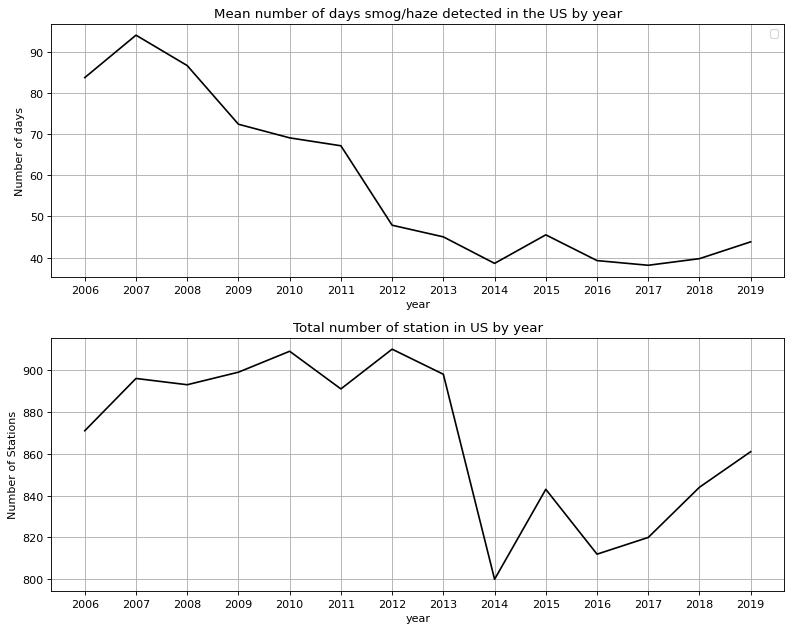

In [20]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(211)
ax1.plot(years[:-1],wt08_count_byyear[:-1],color='black',linestyle='-')
ax1.set_title('Mean number of days smog/haze detected in the US by year')
ax1.set_ylabel('Number of days')
ax1.set_xlabel('year')
ax1.grid()
ax1.legend()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# fig.autofmt_xdate()

ax2 = plt.subplot(212)
# ax1 = fig1.add_axes([0,1,1,1])
ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
ax2.set_title('Total number of station in US by year')
ax2.set_ylabel('Number of Stations')
ax2.set_xlabel('year')
ax2.grid()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
plt.tight_layout() 

The spike in 2005 is correlated to sudden increase in number of stations. My hypothesis is that most of these new stations are were located in smog area. Maybe?
However it does not explain the drop after 2012.

## compute means by year

In [21]:
%%time
wt08_byyear=[]
wt08_yearmean = []
years = np.unique(pdf['year'])
for year in years:
    wt08_thisyear = []
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            wt08_thisyear.append(wt08_graphs[i,:])
    wt08_byyear.append(np.mean(wt08_thisyear, axis=0))
    wt08_yearmean.append(np.mean(wt08_thisyear))
wt08_byyear=np.stack(wt08_byyear)

print(wt08_byyear.shape)

(15, 365)
CPU times: user 4.22 s, sys: 46.9 ms, total: 4.27 s
Wall time: 4.59 s


## plot overall mean by year 

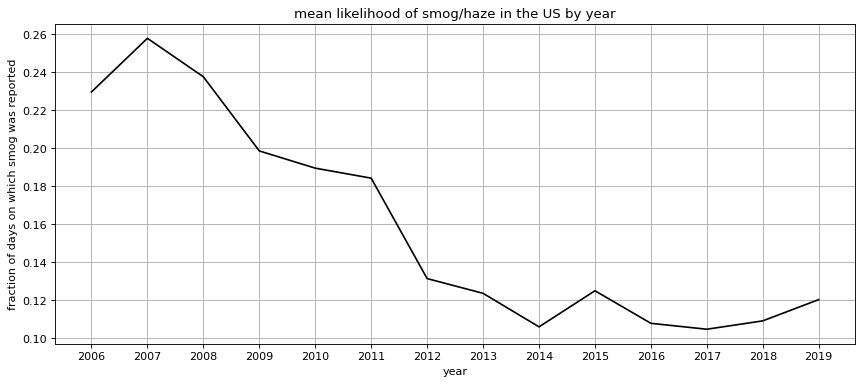

In [22]:
fig1 = plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(years[:-1],wt08_yearmean[:-1],color='black',linestyle='-')
ax1.set_title('mean likelihood of smog/haze in the US by year')
ax1.set_ylabel('fraction of days on which smog was reported')
ax1.set_xlabel('year')
ax1.grid()

## plot by day

In [23]:
wt08_byyear_mean = np.mean(wt08_byyear[:-1,:], axis=0)
wt08_byyear_std = np.std(wt08_byyear[:-1,:], axis=0)

In [24]:
from matplotlib import cm
colmap = cm.get_cmap('jet', len(years)-1)
colors = colmap(range(len(years)-1))

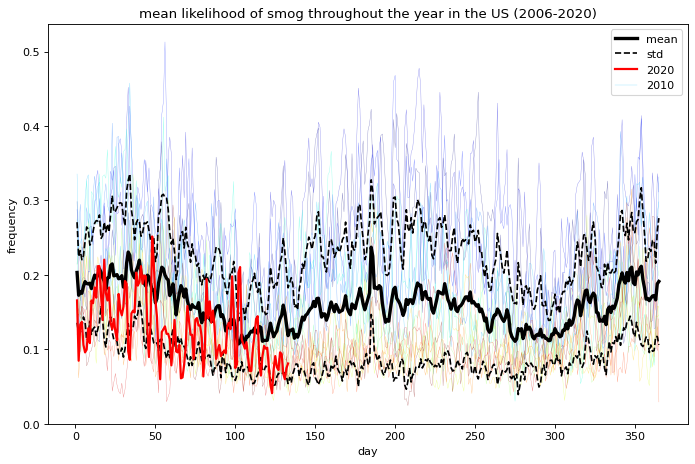

In [25]:
fig2 = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax2 = fig2.add_axes([0,0,1,1])
theLines = []
for i in range(len(years)-1):
    yrplot, = ax2.plot(np.arange(1,366),wt08_byyear[i,:],color=colors[i,:3],alpha=0.5,lw=0.3,label=str(years[i]))
    if int(years[i]) % 10 == 0:
        theLines.append(yrplot)
stdplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean+wt08_byyear_std,color='black',linestyle='--',label='std')
ax2.plot(np.arange(1,366),wt08_byyear_mean-wt08_byyear_std,color='black',linestyle='--')
meanplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean,color='black',lw=3,label='mean')
mean2020, = ax2.plot(np.arange(1,134),wt08_byyear[-1,:133],color='red',alpha=1,lw=2,label='2020')
ax2.set_title('mean likelihood of smog throughout the year in the US (2006-2020)')
ax2.set_ylabel('frequency')
ax2.set_xlabel('day')
allLines = [meanplot, stdplot, mean2020]
for i in range(len(theLines)):
    allLines.append(theLines[i])
ax2.legend(handles=allLines)

# Z-test

In [26]:
wt08_2020 = wt08_byyear[-1,:133]
wt08_2020.shape
wt08_byyear_mean.shape
wt08_byyear_std.shape

z_scores = ( wt08_2020 - wt08_byyear_mean[:len(wt08_2020)] ) / wt08_byyear_std[:len(wt08_2020)] 

In [27]:
z_scores.shape

(133,)

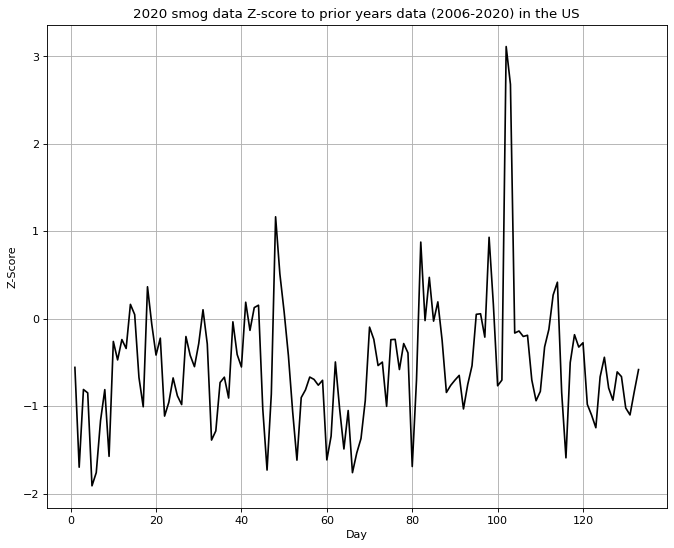

In [28]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
days = np.arange(1,len(z_scores)+1, 1)
ax.plot(days,z_scores,color='black',linestyle='-')
ax.set_title('2020 smog data Z-score to prior years data (2006-2020) in the US')
ax.set_ylabel('Z-Score')
ax.set_xlabel('Day')
ax.grid()
# ax.set_xticks(np.arange(min(days), max(days)+1, 5.0))

In [29]:
p_values = scipy.stats.norm.sf(abs(z_scores)) #one-sided

# p_values = scipy.stats.norm.sf(abs(z_scores))*2 #twosided

mean_p_value = np.mean(p_values)
print(mean_p_value)

0.2653958166334876


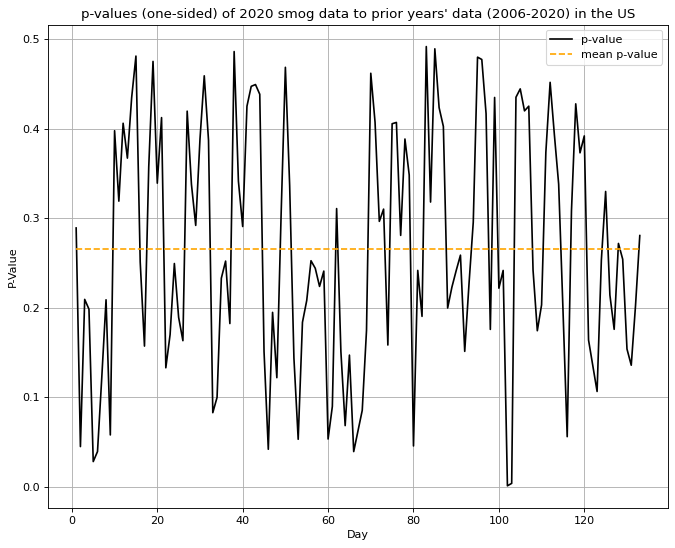

In [30]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
days = np.arange(1,len(p_values)+1, 1)
ax.plot(days,p_values,color='black',linestyle='-',label="p-value")
ax.plot(days,[mean_p_value]*len(days),color='orange',linestyle='--',label="mean p-value")
ax.set_title('p-values (one-sided) of 2020 smog data to prior years\' data (2006-2020) in the US')
ax.set_ylabel('P-Value')
ax.set_xlabel('Day')
ax.grid()
ax.legend()
# ax.set_xticks(np.arange(min(days), max(days)+1, 5.0))

## Linear Fitting days with smog with years for first 133 days

In [31]:
%%time
# print(wt08_graphs)
days = 133
wt08_days_count_byyear = []
for year in years:
#     print("000")
    wt08_count_days_thisyear = []
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            wt08_count_days_thisyear.append(np.sum(wt08_graphs[i,:days]))
    wt08_days_count_byyear.append(np.mean(wt08_count_days_thisyear))

    
print(len(wt08_days_count_byyear))

15
CPU times: user 4.69 s, sys: 0 ns, total: 4.69 s
Wall time: 5.2 s


In [32]:
wt08_days_count_byyear

[26.415614236509757,
 31.271205357142858,
 33.07502799552071,
 27.447163515016687,
 26.03080308030803,
 28.50729517396184,
 17.37912087912088,
 20.535634743875278,
 15.53875,
 19.523131672597867,
 15.516009852216749,
 14.435365853658537,
 13.218009478672986,
 17.173054587688735,
 16.840597758405977]

In [33]:
# linear fit number of days of smogs vs year
years = map(lambda x: int(x), years)
years = list(years)
z = np.polyfit(years[:-1],wt08_days_count_byyear[:-1], 1)
p = np.poly1d(z)
# _ = plt.plot(p(years))

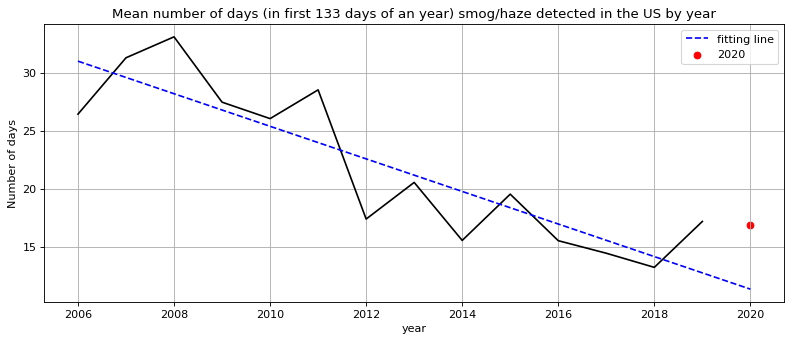

In [34]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(211)
ax1.plot(years[:-1],wt08_days_count_byyear[:-1],color='black',linestyle='-')
ax1.plot(years[:],p(years[:]),color='blue',linestyle='--', label="fitting line")
ax1.scatter(years[-1], wt08_days_count_byyear[-1], color ='red', label="2020")
ax1.set_title('Mean number of days (in first 133 days of an year) smog/haze detected in the US by year')
ax1.set_ylabel('Number of days')
ax1.set_xlabel('year')
ax1.grid()
ax1.legend()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# fig.autofmt_xdate()

# ax2 = plt.subplot(212)
# # ax1 = fig1.add_axes([0,1,1,1])
# ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
# ax2.set_title('Total number of station in US by year')
# ax2.set_ylabel('Number of Stations')
# ax2.set_xlabel('year')
# ax2.grid()
# # plt.xticks(np.arange(min(years), max(years)+1, 5.0))
plt.tight_layout() 